# 영상 데이터 2진 분류 by 전이학습 template

# 데이터 준비


<br>

데이터는 다음과 같이 구성됨

```
dogs/
    train/
        class1/
            file1.jpg
            file2.jpg
             ...
        class2/ 
            file21.jpg
            file22.jpg
             ...    
    test/
        class1/
            file8.jpg
            file9.jpg
             ...
        class2/ 
            file28.jpg
            file29.jpg
             ...       
```

In [17]:
!rm -rf cat_and_dog.zip
!wget https://github.com/dhrim/cau_2021/raw/master/material/deep_learning/data/cat_and_dog.zip
!ls -al  

--2021-09-24 15:50:13--  https://github.com/dhrim/cau_2021/raw/master/material/deep_learning/data/cat_and_dog.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/cau_2021/master/material/deep_learning/data/cat_and_dog.zip [following]
--2021-09-24 15:50:13--  https://raw.githubusercontent.com/dhrim/cau_2021/master/material/deep_learning/data/cat_and_dog.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18902400 (18M) [application/zip]
Saving to: ‘cat_and_dog.zip’

cat_and_dog.zip     100%[===================>]  18.03M  --.-KB/s    in 0.1s    

2021-09-24 15:50:14 (178 MB/s) - ‘cat_and_dog

In [18]:
!rm -rf cat_and_dog
!unzip cat_and_dog.zip
!ls -al cat_and_dog

Archive:  cat_and_dog.zip
   creating: cat_and_dog/
   creating: cat_and_dog/test/
   creating: cat_and_dog/test/Cat/
  inflating: cat_and_dog/test/Cat/189.jpg  
  inflating: cat_and_dog/test/Cat/200.jpg  
  inflating: cat_and_dog/test/Cat/229.jpg  
  inflating: cat_and_dog/test/Cat/89.jpg  
  inflating: cat_and_dog/test/Cat/60.jpg  
  inflating: cat_and_dog/test/Cat/149.jpg  
  inflating: cat_and_dog/test/Cat/160.jpg  
  inflating: cat_and_dog/test/Cat/49.jpg  
  inflating: cat_and_dog/test/Cat/59.jpg  
  inflating: cat_and_dog/test/Cat/170.jpg  
  inflating: cat_and_dog/test/Cat/159.jpg  
  inflating: cat_and_dog/test/Cat/70.jpg  
  inflating: cat_and_dog/test/Cat/99.jpg  
  inflating: cat_and_dog/test/Cat/239.jpg  
  inflating: cat_and_dog/test/Cat/210.jpg  
  inflating: cat_and_dog/test/Cat/199.jpg  
  inflating: cat_and_dog/test/Cat/9.jpg  
  inflating: cat_and_dog/test/Cat/129.jpg  
  inflating: cat_and_dog/test/Cat/289.jpg  
  inflating: cat_and_dog/test/Cat/100.jpg  
  inflatin

# Template

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb2 (Functional)  (None, 7, 7, 1408)        7768569   
_________________________________________________________________
flatten_3 (Flatten)          (None, 68992)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               17662208  
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 25,432,058
Trainable params: 17,662,977
Non-trainable params: 7,769,081
_________________________________________________________________
Found 480 images belonging to 2 classes.
Found 122 images belonging to 2 classes.
Epoch 1/10
7/7 [==

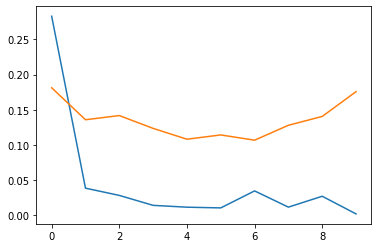

1/1 [==============================] - 1s 229ms/step - loss: 0.1757 - acc: 0.9836
loss= 0.17568370699882507
acc= 0.9836065769195557


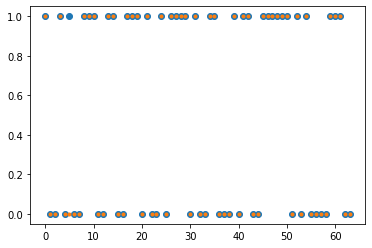

label category index = 1.0
predicted category index = 1
predicted category name = Dog


In [24]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=preprocessor
).flow_from_directory(
      "cat_and_dog/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "cat_and_dog/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


history = model.fit(
      train_data_generator,
      validation_data=test_data_generator,
      steps_per_epoch=train_data_generator.samples/BATCH_SIZE,  
      validation_steps=test_data_generator.samples/BATCH_SIZE,      
      epochs=10
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, acc = model.evaluate(
      test_data_generator,
      steps=test_data_generator.samples/BATCH_SIZE
)
print("loss=", loss)
print("acc=", acc)



test_x, test_y = next(iter(test_data_generator))
y_ = model.predict(test_x)
predicted = (y_>0.5).astype(np.int).squeeze()

plt.plot(test_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", test_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])
